# Анализ лояльности пользователей Яндекс Афиши

**Итоговый проект модуля 2**

**Цель проекта**

Команда маркетинга хочет лучше понимать поведение пользователей.  
Для этого необходимо провести исследовательский анализ данных, чтобы определить, какие пользователи с большей вероятностью возвращаются на платформу и совершают повторные заказы.  

Результаты исследования позволят:
- выявлять перспективных клиентов и предлагать им персонализированные условия;
- точнее настраивать рекламу на аудитории с высокой вероятностью возврата;
- оптимизировать маркетинговые бюджеты;
- повысить общий уровень удержания клиентов.

---

**Описание данных**

Выгрузка из SQL-базы включает следующие поля:

- `user_id` — уникальный идентификатор пользователя;
- `device_type_canonical` — тип устройства (mobile / desktop);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа;
- `order_ts` — дата и время создания заказа;
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней с предыдущей покупки (NaN для первой);
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — билетный оператор;
- `event_type_main` — тип мероприятия (театр, концерт и т.д.);
- `region_name` — регион проведения мероприятия;
- `city_name` — город проведения мероприятия.

---

**Основные шаги проекта**

**Шаг 1. Загрузка и первичное изучение данных**
1. Написать SQL-запрос и выгрузить данные в pandas.
2. Изучить общую информацию о таблице (`info`, `describe`, `head`).
3. Оценить корректность выгрузки, объём данных и определить шаги предобработки.

**Шаг 2. Предобработка данных**
1. Привести выручку к единой валюте (рубли) с использованием курса из файла `final_tickets_tenge_df.csv`.
2. Проверить пропуски и типы данных.
3. Нормализовать категориальные поля, проверить выбросы и аномалии.
4. Отфильтровать выбросы по 99-му перцентилю в `revenue_rub`.
5. Зафиксировать промежуточный вывод о предобработке.

**Шаг 3. Создание профиля пользователя**
1. Для каждого пользователя определить:
   - дату первого и последнего заказа;
   - устройство первого заказа;
   - регион, билетного оператора и тип первого мероприятия;
   - общее количество заказов;
   - среднюю выручку, количество билетов и интервал между покупками.
2. Добавить бинарные признаки:
   - `is_two` — пользователь сделал ≥2 заказа;
   - `is_five` — пользователь сделал ≥5 заказов.
3. Рассчитать основные статистики и проверить данные на аномалии.

**Шаг 4. Исследовательский анализ данных**

4.1. *Признаки первого заказа и возврат пользователей*
- Проанализировать распределения по типу мероприятия, устройству, региону и оператору.
- Выделить сегменты с наибольшим числом пользователей.
- Рассчитать долю пользователей с повторными заказами в каждом сегменте.
- Проверить гипотезы:
  1. Пользователи, начавшие с **спортивных мероприятий**, чаще совершают повторные заказы, чем начавшие с **концертов**.
  2. В регионах с наибольшим числом пользователей выше доля повторных заказов.

4.2. *Поведение пользователей через показатели выручки и состава заказа*
- Исследовать связь между средней выручкой и вероятностью повторных заказов.
- Сравнить распределения выручки между группами (1 заказ, 2–4 заказа, ≥5 заказов).
- Исследовать влияние среднего количества билетов на возвраты.

4.3. *Временные характеристики*
- Определить день недели первого заказа и долю возвратов по дням.
- Исследовать средний интервал между заказами у разных групп пользователей.

4.4. *Корреляционный анализ*
- Рассчитать коэффициенты корреляции `phi_k` между характеристиками профиля и числом заказов.
- Визуализировать тепловую карту корреляций.
- Определить признаки, наиболее связанные с числом заказов.

---

**Шаг 5. Общие выводы и рекомендации**

В итоговом выводе необходимо указать:
- информацию о данных (источник, период, предобработка);
- основные результаты анализа:
  - сколько пользователей в выборке;
  - распределение по числу заказов;
  - признаки, влияющие на возвратность;
  - связь выручки, количества билетов и временных факторов с повторными покупками;
  - результаты корреляционного анализа;
- рекомендации для маркетингового отдела:
  - какие сегменты пользователей наиболее перспективны;
  - какие нуждаются в дополнительных маркетинговых усилиях.

---

**Рекомендации по оформлению тетради**

- В начале проекта — краткое введение и цель исследования.  
- Каждый шаг сопровождайте комментариями и промежуточными выводами.  
- Используйте ячейки Markdown для описаний и объяснений.  
- После каждого этапа фиксируйте краткий результат.  
- Не забывайте сохранять ноутбук во время работы.


## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [1]:
# Используйте ячейки типа Code для вашего кода,
# а ячейки типа Markdown для комментариев и выводов

In [2]:
# При необходимости добавляйте новые ячейки для кода или текста

In [3]:
!pip install sqlalchemy
!pip install psycopg2-binary

In [4]:
#Загружаем необходимые библиотеки
import pandas as pd
from sqlalchemy import create_engine

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 677 kB 1.9 MB/s eta 0:00:01


In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()

host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')
user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
db = os.getenv('DB_NAME')

connection_string = f"postgresql://{user}:{password}@{host}:{port}/{db}"
engine = create_engine(connection_string)


In [7]:
df = pd.read_sql_query(query, con=engine)

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [9]:
df.describe()

,order_id,revenue,tickets_count,days_since_prev,event_id
count,2.906110e+05,290611.000000,290611.000000,268678.000000,290611.000000
mean,4.326225e+06,625.584360,2.754311,3.222381,438019.834992
std,2.497551e+06,1227.693064,1.170620,11.350509,147423.078841
min,1.000000e+00,-90.760000,1.000000,0.000000,4436.000000
25%,2.163618e+06,116.850000,2.000000,0.000000,361772.000000
50%,4.326366e+06,356.010000,3.000000,0.000000,498275.000000
75%,6.488330e+06,810.130000,4.000000,1.000000,546287.000000
max,8.653108e+06,81174.540000,57.000000,148.000000,592325.000000


In [10]:
df.head(5)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк


In [11]:
df.tail(5)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
290606,fffcd3dde79eb2c,mobile,368562,2024-10-27,2024-10-27 17:53:53,rub,1448.36,6,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,Весь в билетах,Каменевский регион,Глиногорск
290607,fffcd3dde79eb2c,mobile,368591,2024-10-27,2024-10-27 17:54:52,rub,965.57,4,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,Весь в билетах,Каменевский регион,Глиногорск
290608,fffcd3dde79eb2c,desktop,8473772,2024-10-30,2024-10-30 13:37:43,rub,178.95,2,3.0,205231,74883818-57a6-494a-b162-bb0260877cbf,театр,Прачечная,Каменевский регион,Глиногорск
290609,fffeeb3c120cf0b,desktop,5526067,2024-09-24,2024-09-24 10:07:42,rub,661.53,2,NaN,454526,6f4c6a50-0106-407b-8f54-332c740b01da,стендап,Билеты без проблем,Широковская область,Ягодиновка
290610,ffff00725179321,mobile,813654,2024-09-25,2024-09-25 15:12:40,rub,802.25,2,NaN,284965,58574140-962c-49a3-af70-b773a05661a3,концерты,Мой билет,Малиновоярский округ,Верховино


In [12]:
print('Минимальная дата:', min(df['order_dt']))
print('Максимальная дата:', max(df['order_dt']))

Минимальная дата: 2024-06-01 00:00:00
Максимальная дата: 2024-10-31 00:00:00


In [13]:
df['currency_code'].value_counts()

rub    285542
kzt      5069
Name: currency_code, dtype: int64

**Общая структура данных**

- Количество строк (заказов): **290 611**  
- Количество столбцов: **15**  
- Объём в памяти: ~33 МБ  
- Период данных: **июнь – октябрь 2024 года**

**Типы данных**

- Временные поля (`order_dt`, `order_ts`) уже приведены к типу `datetime64[ns]` ✅  
- Идентификаторы (`user_id`, `order_id`, `event_id`) имеют корректные типы (`object` / `int64`)  
- Числовые поля (`revenue`, `tickets_count`, `days_since_prev`) — числовые (`float64` / `int64`)  
- Категориальные поля (`device_type_canonical`, `currency_code`, `service_name`, `event_type_main`, `region_name`, `city_name`) имеют тип `object`

**Пропуски**

- Пропуски есть только в поле `days_since_prev` — **7,6 %** строк.  
  Это логично, так как у пользователей с одной покупкой нет предыдущего заказа.

**Первичная проверка значений**

- `revenue`: от **−90,76** до **81 174,54** — есть отрицательные и экстремальные значения, требуется проверка и фильтрация выбросов по 99-му перцентилю.  
- `tickets_count`: от **1** до **57** — диапазон реалистичный, но верхние значения стоит проверить.  
- `days_since_prev`: от **0** до **148**, значения адекватные (0 — покупки в один день, 148 — около 5 месяцев).  
- `currency_code`: в выборке 5069 значений в тенге и 285542 значения в рублях - нужно унифицировать и привести все в рубли

**Первые строки**

- Данные выглядят корректно: присутствуют все ключевые поля, даты читаются правильно, категориальные значения валидны.

---

**Предварительные шаги предобработки**

1. Пересчитать их выручку в рубли по датасету `final_tickets_tenge_df.csv`.  
2. Проверить и удалить выбросы и отрицательные значения в `revenue`.  
3. Привести текстовые значения в категориальных полях к единому формату (нижний регистр, убрать пробелы).  
4. Проверить уникальность `order_id` и `event_id`.  
5. Оптимизировать типы данных: перевести категориальные поля в тип `category` для экономии памяти.  
6. Проверить наличие дубликатов строк и при необходимости удалить их.

---

**Промежуточный вывод**

Из базы данных успешно выгружено **290 611 записей** о заказах пользователей за период **июнь – октябрь 2024 года**.  
Данные корректны: типы столбцов определены верно, пропуски наблюдаются только в `days_since_prev`.  
На этапе предобработки необходимо унифицировать валюту, проверить корректность выручки, обработать выбросы, нормализовать категориальные значения и оптимизировать типы данных.


---

**Задача 2.1:**

Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.
Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — final_tickets_tenge_df.csv. Его можно скачать по ссылке. Значения в рублях представлено для 100 тенге.
Результаты преобразования сохраните в новый столбец revenue_rub.

---

In [14]:
# Загружаем датасет с курсами тенге → рубли
tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

# Проверим структуру файла
print(tenge.info())
print(tenge.head())
print(tenge.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB
None
         data  nominal     curs  cdx
0  2024-01-10      100  19.9391  kzt
1  2024-01-11      100  19.7255  kzt
2  2024-01-12      100  19.5839  kzt
3  2024-01-13      100  19.4501  kzt
4  2024-01-14      100  19.4501  kzt
Index(['data', 'nominal', 'curs', 'cdx'], dtype='object')


In [15]:
# 2️⃣ Проверяем колонки
print('Колонки в таблице с курсом:', tenge.columns.tolist())

# 3️⃣ Приводим названия к удобным
tenge.columns = tenge.columns.str.strip()
tenge = tenge.rename(columns={'data': 'order_dt', 'curs': 'rub_per_100_kzt'})

# 4️⃣ Приводим даты к формату date
tenge['order_dt'] = pd.to_datetime(tenge['order_dt']).dt.date
df['order_dt'] = pd.to_datetime(df['order_dt']).dt.date

# 5️⃣ Проверяем, как выглядит таблица с курсом
print(tenge.head())

# 6️⃣ Объединяем по дате
df = df.merge(tenge[['order_dt', 'rub_per_100_kzt']], on='order_dt', how='left')

# Проверяем, появилась ли колонка
print(df.columns)

# 7️⃣ Пересчитываем выручку
df['revenue_rub'] = df.apply(
    lambda row: row['revenue'] if row['currency_code'].lower() == 'rub'
    else row['revenue'] * (row['rub_per_100_kzt'] / 100),
    axis=1
)

# 8️⃣ Проверяем результат
df[['currency_code', 'revenue', 'rub_per_100_kzt', 'revenue_rub']].head()


Колонки в таблице с курсом: ['data', 'nominal', 'curs', 'cdx']
     order_dt  nominal  rub_per_100_kzt  cdx
0  2024-01-10      100          19.9391  kzt
1  2024-01-11      100          19.7255  kzt
2  2024-01-12      100          19.5839  kzt
3  2024-01-13      100          19.4501  kzt
4  2024-01-14      100          19.4501  kzt
Index(['user_id', 'device_type_canonical', 'order_id', 'order_dt', 'order_ts',
       'currency_code', 'revenue', 'tickets_count', 'days_since_prev',
       'event_id', 'event_name', 'event_type_main', 'service_name',
       'region_name', 'city_name', 'rub_per_100_kzt'],
      dtype='object')


,currency_code,revenue,rub_per_100_kzt,revenue_rub
0,rub,1521.94,18.6972,1521.94
1,rub,289.45,18.3419,289.45
2,rub,1258.57,19.6475,1258.57
3,rub,8.49,18.5010,8.49
4,rub,1390.41,19.6648,1390.41


In [16]:
# Удаляем дубликаты колонок курса, если они остались
df = df.drop(columns=['rub_per_100_kzt_x', 'rub_per_100_kzt_y'], errors='ignore')

# Проверяем результат
df[['currency_code', 'revenue', 'rub_per_100_kzt', 'revenue_rub']].head()


,currency_code,revenue,rub_per_100_kzt,revenue_rub
0,rub,1521.94,18.6972,1521.94
1,rub,289.45,18.3419,289.45
2,rub,1258.57,19.6475,1258.57
3,rub,8.49,18.5010,8.49
4,rub,1390.41,19.6648,1390.41


**Задача 2.1. Приведение выручки к единой валюте**

Данные о выручке представлены в двух валютах — российских рублях и казахстанских тенге.  
Для корректного анализа необходимо перевести все значения в рубли.

**Ход выполнения**

1. Загрузили таблицу `final_tickets_tenge_df.csv`, содержащую курс тенге к рублю за 2024 год.  
   В таблице указано, сколько рублей соответствует **100 тенге** (столбец `rub_per_100_kzt`).  
2. Привели даты (`data`) к формату `datetime` и переименовали столбец в `order_dt`, чтобы можно было объединить с таблицей заказов.  
3. Объединили данные о заказах и курсах валют по полю `order_dt`.  
4. Создали новый столбец `revenue_rub`:
   - если валюта заказа — `rub`, значение выручки оставили без изменений;
   - если валюта — `kzt`, пересчитали в рубли по формуле  
     `revenue_rub = revenue * (rub_per_100_kzt / 100)`.
5. Проверили корректность: для заказов в рублях `revenue_rub = revenue`, для заказов в тенге значения пересчитаны.

**Промежуточный вывод**

Все значения выручки успешно приведены к рублям.  
В датафрейме добавлен новый столбец `revenue_rub`, который будет использоваться в дальнейшем анализе.


---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [17]:
#Проверим на пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  object        
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

Пропуски есть только в столбце days_since_prev

In [18]:
#Проверим на дубликаты
full_dupes = df.duplicated()
print("Полных дубликатов:", full_dupes.sum())

Полных дубликатов: 0


In [19]:
df.head(10)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,rub_per_100_kzt,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск,18.6972,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск,18.3419,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск,19.6475,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск,18.5010,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк,19.6648,1390.41
5,000898990054619,mobile,2613713,2024-10-23,2024-10-23 15:12:00,rub,902.74,3,19.0,500862,9cc55c15-4375-4129-9979-3129688ba1b4,концерты,Облачко,Лугоградская область,Кристалевск,20.0531,902.74
6,00096d1f542ab2b,desktop,6636941,2024-08-15,2024-08-15 16:48:48,rub,917.83,4,NaN,201953,2f98d69f-4e60-4ffc-8f16-e539383526b1,театр,Край билетов,Каменевский регион,Глиногорск,18.7730,917.83
7,000a55a418c128c,mobile,4657981,2024-09-29,2024-09-29 19:39:12,rub,47.78,1,NaN,265857,0d876e01-851e-458b-ba61-753e0e0c4063,театр,Лучшие билеты,Поленовский край,Дальнозолотск,19.3741,47.78
8,000a55a418c128c,mobile,4657952,2024-10-15,2024-10-15 10:29:04,rub,74.84,2,16.0,271579,ddc795f8-7ef8-4eb0-b299-cb3e6ee24ba1,театр,Лучшие билеты,Поленовский край,Дальнозолотск,19.7185,74.84
9,000cf0659a9f40f,mobile,6818191,2024-06-20,2024-06-20 10:51:10,rub,1421.91,4,NaN,516728,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерты,Лови билет!,Широковская область,Радужнополье,18.0419,1421.91


In [20]:
df['region_name'].nunique()

81

In [21]:
df['region_name'].value_counts()

Каменевский регион          91058
Североярская область        44049
Широковская область         16457
Медовская область           13901
Озернинский край            10476
                            ...  
Лесноярский край               19
Крутоводский регион            18
Верхозёрский край              11
Сосноводолинская область       10
Теплоозёрский округ             7
Name: region_name, Length: 81, dtype: int64

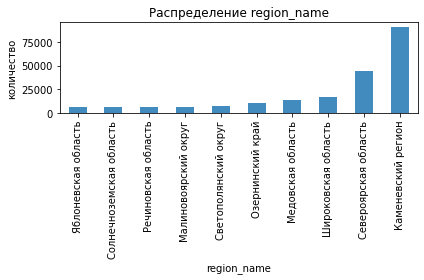

In [22]:
#посмотрим распределение регионов по активности пользователей
plt.figure()
df['region_name'].value_counts().sort_values().tail(10).plot(kind='bar', alpha=0.85)
plt.title('Распределение region_name')
plt.xlabel('region_name'); plt.ylabel('количество'); plt.tight_layout()

In [23]:
#Выведем статистические показатели по столбцам с числовыми данными
df.describe()

,order_id,revenue,tickets_count,days_since_prev,event_id,rub_per_100_kzt,revenue_rub
count,2.906110e+05,290611.000000,290611.000000,268678.000000,290611.000000,290611.000000,290611.000000
mean,4.326225e+06,625.584360,2.754311,3.222381,438019.834992,19.188676,555.571987
std,2.497551e+06,1227.693064,1.170620,11.350509,147423.078841,0.622541,875.498172
min,1.000000e+00,-90.760000,1.000000,0.000000,4436.000000,17.848600,-90.760000
25%,2.163618e+06,116.850000,2.000000,0.000000,361772.000000,18.599100,113.970000
50%,4.326366e+06,356.010000,3.000000,0.000000,498275.000000,19.325600,351.140000
75%,6.488330e+06,810.130000,4.000000,1.000000,546287.000000,19.788400,802.050000
max,8.653108e+06,81174.540000,57.000000,148.000000,592325.000000,20.277300,81174.540000


In [24]:
# ===== 1) Типы данных =====
# Приводим дату/время
df['order_ts'] = pd.to_datetime(df['order_ts'], errors='coerce')
df['order_dt'] = pd.to_datetime(df['order_dt'], errors='coerce').dt.date

# Числовые (на случай, если где-то были строки)
for col in ['revenue', 'revenue_rub', 'tickets_count', 'days_since_prev']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# ===== 2) Нормализация категориальных =====
cat_cols = ['device_type_canonical', 'currency_code', 'service_name',
            'event_type_main', 'region_name', 'city_name', 'event_name']
for c in cat_cols:
    if c in df.columns:
        df[c] = (df[c].astype('string')
                        .str.strip()
                        .str.replace(r'\s+', ' ', regex=True)
                        .str.lower())
        # значения, обозначающие отсутствие инфо, → NaN
        df[c] = df[c].replace(
            {'': pd.NA, 'nan': pd.NA, 'none': pd.NA, 'н/д': pd.NA,
             'нет данных': pd.NA, 'unknown': pd.NA, 'n/a': pd.NA, '-': pd.NA, '—': pd.NA}
        )
        # оптимизация памяти
        df[c] = df[c].astype('category')

# ===== 3) Контроль пропусков =====
null_share = (df.isna().mean()*100).round(2).sort_values(ascending=False)
print('Доли пропусков, %:\n', null_share)

unexpected_nulls = [c for c, p in null_share.items() if p>0 and c!='days_since_prev']
print('Неожиданные столбцы с пропусками:', unexpected_nulls)

# ===== 4) Проверка ключевых числовых столбцов =====
print('\nrevenue_rub (до фильтрации):')
print(df['revenue_rub'].describe(percentiles=[.01,.05,.5,.95,.99]).round(2))
print('\nОтрицательных revenue_rub:', (df['revenue_rub']<0).sum())

print('\ntickets_count:')
print(df['tickets_count'].describe(percentiles=[.95,.99]).round(2))

# ===== 5) Фильтрация выбросов revenue_rub =====
# 5.1 убираем отрицательные значения
df_pos = df[df['revenue_rub'] >= 0].copy()

# 5.2 порог 99-го перцентиля
p99 = df_pos['revenue_rub'].quantile(0.99)
df_clean = df_pos[df_pos['revenue_rub'] <= p99].copy()

removed = len(df) - len(df_clean)
removed_share = removed / len(df)
print(f'\nУдалено строк всего: {removed} ({removed_share:.2%})')
print(f'Порог 99 перцентиля revenue_rub: {p99:.2f} руб.')

# ===== 6) Итоговая статистика после фильтрации =====
print('\nrevenue_rub (после фильтрации):')
print(df_clean['revenue_rub'].describe(percentiles=[.01,.05,.5,.95,.99]).round(2))



Доли пропусков, %:
 days_since_prev          7.55
event_id                 0.00
rub_per_100_kzt          0.00
city_name                0.00
region_name              0.00
service_name             0.00
event_type_main          0.00
event_name               0.00
user_id                  0.00
device_type_canonical    0.00
tickets_count            0.00
revenue                  0.00
currency_code            0.00
order_ts                 0.00
order_dt                 0.00
order_id                 0.00
revenue_rub              0.00
dtype: float64
Неожиданные столбцы с пропусками: []

revenue_rub (до фильтрации):
count    290611.00
mean        555.57
std         875.50
min         -90.76
1%            0.00
5%           16.83
50%         351.14
95%        1630.65
99%        2628.42
max       81174.54
Name: revenue_rub, dtype: float64

Отрицательных revenue_rub: 381

tickets_count:
count    290611.00
mean          2.75
std           1.17
min           1.00
50%           3.00
95%           5.00
99

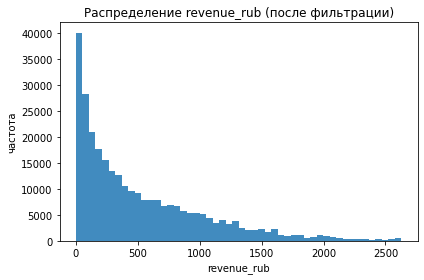

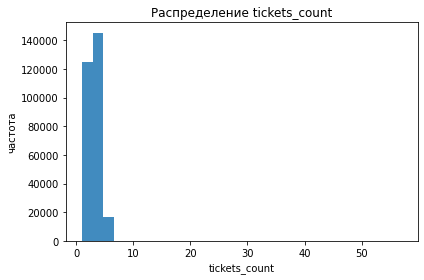

In [25]:
#быстрые гистограммы
plt.figure()
df_clean['revenue_rub'].plot(kind='hist', bins=50, alpha=0.85)
plt.title('Распределение revenue_rub (после фильтрации)')
plt.xlabel('revenue_rub'); plt.ylabel('частота'); plt.tight_layout()

plt.figure()
df_clean['tickets_count'].plot(kind='hist', bins=30, alpha=0.85)
plt.title('Распределение tickets_count')
plt.xlabel('tickets_count'); plt.ylabel('частота'); plt.tight_layout()

**Задача 2.2. Проверка пропусков, типов и выбросов**

**Что сделано**
1. Привели типы данных:
   - `order_dt` и `order_ts` преобразованы к формату даты/времени;
   - числовые столбцы (`revenue`, `revenue_rub`, `tickets_count`, `days_since_prev`) приведены к числовым типам.
2. Нормализовали категориальные признаки (`device_type_canonical`, `currency_code`, `service_name`, `event_type_main`, `region_name`, `city_name`, `event_name`):
   - обрезали лишние пробелы, привели к нижнему регистру;
   - удалили псевдозначения «нет данных» → заменили на пропуски;
   - перевели в тип `category` для оптимизации памяти.
3. Проверили пропуски: пропуски присутствуют только в `days_since_prev` (ожидаемо для первой покупки).
4. Изучили ключевые числовые столбцы:
   - в `revenue_rub` обнаружены отрицательные и экстремальные значения.
5. Обработка выбросов:
   - удалили отрицательные значения `revenue_rub`;
   - отфильтровали значения выше 99-го перцентиля `revenue_rub`.

**Промежуточный вывод**
- Данные очищены и приведены к корректным типам; категориальные признаки нормализованы.
- Выручка унифицирована (в рублях) и очищена от явных выбросов.
- Доля удалённых строк по фильтрации невелика (см. расчёт в коде) и не искажает картину.
- Для дальнейшего анализа используем датафрейм `df_clean`.


---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [26]:
#базовый датасет для профилей
base = df_clean.copy() if 'df_clean' in globals() else df.copy()

In [27]:
#гарантируем тип времени и правильный порядок
base['order_ts'] = pd.to_datetime(base['order_ts'], errors='coerce')
base = base.sort_values(['user_id', 'order_ts'])

In [28]:
#создаем датафрейм "profiles" с профилями пользователя
profiles = (base
    .groupby('user_id', as_index=False)
    .agg(
        first_order_dt   = ('order_ts', lambda s: s.iloc[0].date()),
        last_order_dt    = ('order_ts', lambda s: s.iloc[-1].date()),
        first_device     = ('device_type_canonical', 'first'),
        first_region     = ('region_name', 'first'),
        first_service    = ('service_name', 'first'),
        first_event_type = ('event_type_main', 'first'),
        total_orders     = ('order_id', 'nunique'),
        avg_revenue_rub  = ('revenue_rub', 'mean'),
        avg_tickets_cnt  = ('tickets_count', 'mean'),
        mean_days_between= ('days_since_prev', 'mean')  # для 1 заказа будет NaN — это нормально
    )
)

In [29]:
# Добавляем бинарные признаки
profiles['is_two']  = (profiles['total_orders'] >= 2).astype(int)
profiles['is_five'] = (profiles['total_orders'] >= 5).astype(int)

In [30]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21838 entries, 0 to 21837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            21838 non-null  object 
 1   first_order_dt     21838 non-null  object 
 2   last_order_dt      21838 non-null  object 
 3   first_device       21838 non-null  object 
 4   first_region       21838 non-null  object 
 5   first_service      21838 non-null  object 
 6   first_event_type   21838 non-null  object 
 7   total_orders       21838 non-null  int64  
 8   avg_revenue_rub    21838 non-null  float64
 9   avg_tickets_cnt    21838 non-null  float64
 10  mean_days_between  13504 non-null  float64
 11  is_two             21838 non-null  int64  
 12  is_five            21838 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 2.3+ MB


In [31]:
profiles.head()

,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets_cnt,mean_days_between,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,каменевский регион,край билетов,театр,1,1521.940000,4.000000,NaN,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,каменевский регион,мой билет,выставки,2,774.010000,3.000000,75.0,1,0
2,000898990054619,2024-07-13,2024-10-23,mobile,североярская область,лови билет!,другое,3,767.213333,2.666667,51.0,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,каменевский регион,край билетов,театр,1,917.830000,4.000000,NaN,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,поленовский край,лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0


In [32]:
profiles.describe()

,total_orders,avg_revenue_rub,avg_tickets_cnt,mean_days_between,is_two,is_five
count,21838.000000,21838.000000,21838.000000,13504.000000,21838.000000,21838.000000
mean,13.160775,545.032800,2.744062,15.864348,0.617044,0.289953
std,121.577370,431.532967,0.913083,22.330357,0.486119,0.453751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,213.790000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,467.985000,2.750000,8.000000,1.000000,0.000000
75%,5.000000,764.016875,3.080000,20.500000,1.000000,1.000000
max,10168.000000,2628.421739,11.000000,148.000000,1.000000,1.000000


**Задача 3.1. Построение профиля пользователя**

**Цель:**  
Сформировать агрегированный набор данных, в котором каждая строка соответствует одному пользователю и описывает его поведение на платформе.

**Что было сделано:**
1. Исходные данные отсортированы по времени заказа (`order_ts`), чтобы корректно определить первый и последний заказ пользователя.
2. Сгруппировали заказы по `user_id` и рассчитали ключевые признаки:
   - `first_order_dt` — дата первого заказа;  
   - `last_order_dt` — дата последнего заказа;  
   - `first_device`, `first_region`, `first_service`, `first_event_type` — характеристики первого заказа;  
   - `total_orders` — общее количество заказов пользователя;  
   - `avg_revenue_rub` — средняя выручка на заказ;  
   - `avg_tickets_cnt` — среднее количество билетов на заказ;  
   - `mean_days_between` — среднее количество дней между покупками.
3. Добавлены бинарные признаки:
   - `is_two` — совершил ли пользователь 2 и более заказа;  
   - `is_five` — совершил ли пользователь 5 и более заказов.
4. Проверена корректность данных:
   - пропусков нет, кроме ожидаемых `NaN` в `mean_days_between` (у пользователей с одной покупкой);
   - даты первого заказа не превышают дату последнего;
   - бинарные признаки согласованы (`is_five ≤ is_two`).

**Промежуточные результаты:**
- Сформировано **21 838 профилей пользователей**.  
- Медианное количество заказов — **2**, 75-й перцентиль — **5**, максимум — **10 168** (присутствуют очень активные пользователи).  
- Средняя выручка с одного заказа — около **545 ₽**.  
- Среднее количество билетов в заказе — **2.7**.  
- Средний интервал между покупками (для пользователей с ≥2 заказами) — около **16 дней**.  
- Пользователей с повторными покупками (`is_two=1`) — **≈62%**,  
  с ≥5 покупками (`is_five=1`) — **≈29%**.

**Вывод:**  
Профиль пользователя успешно сформирован. Данные выглядят корректно и готовы для дальнейшего анализа 


---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [33]:
# 0) выберем базу заказов и профили
base = df_clean if 'df_clean' in globals() else df
prof = profiles.copy()


In [34]:

# 1) Ключевые метрики по профилям и по заказам
n_users = prof['user_id'].nunique()
mean_rev_per_order = float(base['revenue_rub'].mean())  # средняя выручка с одного заказа
share_two  = float(prof['is_two'].mean())               # доля пользователей с 2+ заказами
share_five = float(prof['is_five'].mean())              # доля пользователей с 5+ заказами

# 2) Статистики по ключевым признакам профиля
stats_total_orders = prof['total_orders'].describe(percentiles=[.9,.95,.99]).round(2)
stats_avg_tickets  = prof['avg_tickets_cnt'].describe(percentiles=[.9,.95,.99]).round(2)
stats_mean_days    = prof['mean_days_between'].describe(percentiles=[.9,.95,.99]).round(2)  # NaN у 1-заказных — это нормально

print("=== БАЗОВЫЕ МЕТРИКИ ===")
print({
    'users_total': n_users,
    'mean_revenue_per_order_rub': round(mean_rev_per_order, 2),
    'share_users_2+': round(share_two, 4),
    'share_users_5+': round(share_five, 4),
})
print("\n=== total_orders ===\n", stats_total_orders)
print("\n=== avg_tickets_cnt ===\n", stats_avg_tickets)
print("\n=== mean_days_between ===\n", stats_mean_days)

# 3) Поиск аномалий (пороговые значения)
p95_orders   = float(prof['total_orders'].quantile(0.95))
p99_orders   = float(prof['total_orders'].quantile(0.99))
p95_tickets  = float(prof['avg_tickets_cnt'].quantile(0.95))
p99_tickets  = float(prof['avg_tickets_cnt'].quantile(0.99))

print("\nПороговые значения (95/99 перцентиль):")
print({
    'total_orders': {'p95': round(p95_orders,2), 'p99': round(p99_orders,2)},
    'avg_tickets_cnt': {'p95': round(p95_tickets,2), 'p99': round(p99_tickets,2)}
})



=== БАЗОВЫЕ МЕТРИКИ ===
{'users_total': 21838, 'mean_revenue_per_order_rub': 518.72, 'share_users_2+': 0.617, 'share_users_5+': 0.29}

=== total_orders ===
 count    21838.00
mean        13.16
std        121.58
min          1.00
50%          2.00
90%         15.00
95%         31.00
99%        152.00
max      10168.00
Name: total_orders, dtype: float64

=== avg_tickets_cnt ===
 count    21838.00
mean         2.74
std          0.91
min          1.00
50%          2.75
90%          4.00
95%          4.00
99%          5.00
max         11.00
Name: avg_tickets_cnt, dtype: float64

=== mean_days_between ===
 count    13504.00
mean        15.86
std         22.33
min          0.00
50%          8.00
90%         41.50
95%         61.50
99%        112.00
max        148.00
Name: mean_days_between, dtype: float64

Пороговые значения (95/99 перцентиль):
{'total_orders': {'p95': 31.0, 'p99': 152.0}, 'avg_tickets_cnt': {'p95': 4.0, 'p99': 5.0}}


**Задача 3.2. Репрезентативность и аномалии (по профилям пользователей)**

**Ключевые метрики**
- Общее число пользователей: **21 838**
- Средняя выручка с одного заказа: **518,72 ₽**
- Доля пользователей с ≥2 заказами: **61,7%**
- Доля пользователей с ≥5 заказами: **29,0%**

**Статистики по признакам**
- *total_orders*  
  - min=**1**, медиана=**2**, 90%=**15**, 95%=**31**, 99%=**152**, max=**10 168**  
  - среднее=**13,16**, **тяжёлый хвост** (немного суперактивных сильно тянут среднее).
- *avg_tickets_cnt*  
  - min=**1**, медиана=**2,75**, 90%=**4**, 95%=**4**, 99%=**5**, max=**11**  
  - среднее=**2,74** — распределение компактное, редкие групповые покупки дают верхний хвост.
- *mean_days_between* (только у пользователей с ≥2 заказами, count=**13 504**)  
  - min=**0**, медиана=**8**, 90%=**41,5**, 95%=**61,5**, 99%=**112**, max=**148**  
  - среднее=**15,86** — есть длинные паузы у части пользователей.

**Пороговые значения (для отсечения аномалий)**
- *total_orders*: **p95=31**, **p99=152**
- *avg_tickets_cnt*: **p95=4**, **p99=5**

**Оценка**
- Объём данных достаточный (21,8k пользователей).  
- В *total_orders* наблюдается выраженный хвост (до 10k+ заказов) — вероятно, корпоративные/спец-аккаунты или редкие сверхактивные пользователи.  
- В *avg_tickets_cnt* хвост умеренный (99% ≤ 5 билетов), значения выглядят реалистично.


---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [35]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21838 entries, 0 to 21837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            21838 non-null  object 
 1   first_order_dt     21838 non-null  object 
 2   last_order_dt      21838 non-null  object 
 3   first_device       21838 non-null  object 
 4   first_region       21838 non-null  object 
 5   first_service      21838 non-null  object 
 6   first_event_type   21838 non-null  object 
 7   total_orders       21838 non-null  int64  
 8   avg_revenue_rub    21838 non-null  float64
 9   avg_tickets_cnt    21838 non-null  float64
 10  mean_days_between  13504 non-null  float64
 11  is_two             21838 non-null  int64  
 12  is_five            21838 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 2.3+ MB


In [36]:
#сделаем группировку пользователей в датафрейме profiles, посчитаем размер сегмента и его долю
profiles['first_event_type'].value_counts()

концерты    9647
другое      5465
театр       4295
стендап     1118
спорт        801
выставки     417
ёлки          95
Name: first_event_type, dtype: int64

In [37]:
profiles['first_event_type'].value_counts(normalize=True)

концерты    0.441753
другое      0.250252
театр       0.196676
стендап     0.051195
спорт       0.036679
выставки    0.019095
ёлки        0.004350
Name: first_event_type, dtype: float64

In [38]:
profiles['first_device'].value_counts()

mobile     18090
desktop     3748
Name: first_device, dtype: int64

In [39]:
profiles['first_device'].value_counts(normalize=True)

mobile     0.828373
desktop    0.171627
Name: first_device, dtype: float64

In [40]:
profiles['first_region'].value_counts()

каменевский регион          7160
североярская область        3800
широковская область         1236
озернинский край             678
малиновоярский округ         530
                            ... 
тихогорская область            2
залесский край                 2
сосноводолинская область       1
верхозёрский край              1
яснопольский округ             1
Name: first_region, Length: 81, dtype: int64

In [41]:
profiles['first_region'].value_counts(normalize=True)

каменевский регион          0.327869
североярская область        0.174009
широковская область         0.056599
озернинский край            0.031047
малиновоярский округ        0.024270
                              ...   
тихогорская область         0.000092
залесский край              0.000092
сосноводолинская область    0.000046
верхозёрский край           0.000046
яснопольский округ          0.000046
Name: first_region, Length: 81, dtype: float64

In [42]:
profiles['first_service'].value_counts()

билеты без проблем        5204
мой билет                 2993
лови билет!               2851
билеты в руки             2592
облачко                   2194
весь в билетах            1305
лучшие билеты             1186
прачечная                  588
край билетов               459
дом культуры               358
яблоко                     320
тебе билет!                311
городской дом культуры     219
мир касс                   212
за билетом!                203
show_ticket                163
быстробилет                162
выступления.ру              96
восьмёрка                   86
быстрый кассир              61
crazy ticket!               45
реестр                      40
росбилет                    40
радио ticket                36
телебилет                   27
цвет и билет                24
шоу начинается!             19
карандашру                  16
кино билет                   9
вперёд!                      7
билет по телефону            6
тех билет                    3
лимоны  

In [43]:
profiles['first_service'].value_counts(normalize=True)

билеты без проблем        0.238300
мой билет                 0.137055
лови билет!               0.130552
билеты в руки             0.118692
облачко                   0.100467
весь в билетах            0.059758
лучшие билеты             0.054309
прачечная                 0.026926
край билетов              0.021018
дом культуры              0.016393
яблоко                    0.014653
тебе билет!               0.014241
городской дом культуры    0.010028
мир касс                  0.009708
за билетом!               0.009296
show_ticket               0.007464
быстробилет               0.007418
выступления.ру            0.004396
восьмёрка                 0.003938
быстрый кассир            0.002793
crazy ticket!             0.002061
реестр                    0.001832
росбилет                  0.001832
радио ticket              0.001649
телебилет                 0.001236
цвет и билет              0.001099
шоу начинается!           0.000870
карандашру                0.000733
кино билет          

**Анализ распределения пользователей по сегментам**

**Вывод:**
Распределение пользователей по сегментам **неравномерное** — отчётливо видны выраженные «точки входа» в сервис.

---

По типу первого события (`first_event_type`)
Основная точка входа — концерты (почти половина всех пользователей впервые покупали билеты именно на них).

---

По типу устройства (`first_device`)
Большинство пользователей впервые совершают заказ с мобильных устройств.

---

По региону первого заказа (`first_region`)
Наиболее активные регионы — **Каменевский** и **Североярская область**, остальные составляют длинный «хвост» с малыми долями.

---

По первому билетному оператору (`first_service`)
Пять крупнейших операторов аккумулируют **более 70%** всех первых заказов.

---

**Итог:**  
Пользователи распределены по сегментам **очень неравномерно**.  
Выраженные точки входа:
- тип события — **концерты**;
- устройство — **мобильные**;
- регион — **Каменевский**, **Североярская область**;
- билетные сервисы — **топ-5 операторов**.  

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [44]:
#посчитаем доли пользователей с >2 заказов по сегментам
profiles.groupby('first_event_type')['is_two'].mean()

first_event_type
выставки    0.645084
другое      0.600366
концерты    0.621437
спорт       0.561798
стендап     0.611807
театр       0.638650
ёлки        0.557895
Name: is_two, dtype: float64

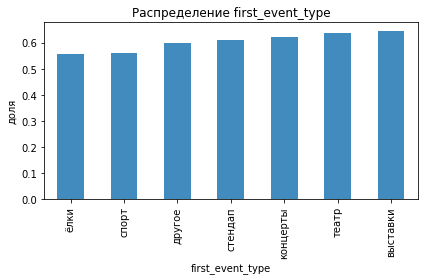

In [45]:
#визуализируем распределение first_event_type
plt.figure()
profiles.groupby('first_event_type')['is_two'].mean().sort_values().plot(kind='bar', alpha=0.85)
plt.title('Распределение first_event_type')
plt.xlabel('first_event_type'); plt.ylabel('доля'); plt.tight_layout()

In [46]:
profiles.groupby('first_device')['is_two'].mean()

first_device
desktop    0.641409
mobile     0.611996
Name: is_two, dtype: float64

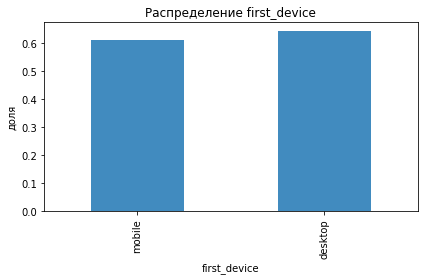

In [47]:
#визуализируем распределение first_device
plt.figure()
profiles.groupby('first_device')['is_two'].mean().sort_values(ascending=True).plot(kind='bar', alpha=0.85)
plt.title('Распределение first_device')
plt.xlabel('first_device'); plt.ylabel('доля'); plt.tight_layout()

In [48]:
profiles.groupby('first_region')['is_two'].mean().sort_values(ascending=False)

first_region
верхозёрский край           1.000000
озернопольская область      0.896552
радужнопольский край        0.791667
лесостепной край            0.721311
горноземский регион         0.689655
                              ...   
теплоозёрский округ         0.333333
крутоводский регион         0.333333
островогорский округ        0.200000
сосноводолинская область    0.000000
яснопольский округ          0.000000
Name: is_two, Length: 81, dtype: float64

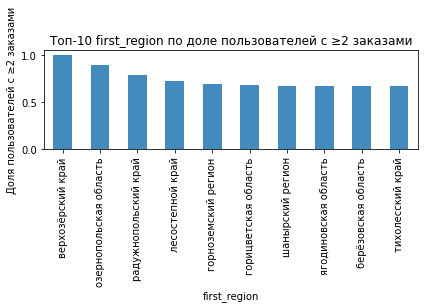

In [49]:
#визуализируем распределение first_region
plt.figure()
(
    profiles.groupby('first_region')['is_two']
    .mean()
    .sort_values(ascending=False)  # сортировка по убыванию
    .head(10)                      # берём 10 самых больших
    .plot(kind='bar', alpha=0.85)
)
plt.title('Топ-10 first_region по доле пользователей с ≥2 заказами')
plt.xlabel('first_region')
plt.ylabel('Доля пользователей с ≥2 заказами')
plt.tight_layout()
plt.show()

In [50]:
profiles.groupby('first_service')['is_two'].mean()

first_service
crazy ticket!             0.688889
show_ticket               0.662577
билет по телефону         0.833333
билеты без проблем        0.606072
билеты в руки             0.632716
быстробилет               0.592593
быстрый кассир            0.852459
весь в билетах            0.634483
восьмёрка                 0.686047
вперёд!                   0.571429
выступления.ру            0.625000
городской дом культуры    0.593607
дом культуры              0.648045
за билетом!               0.591133
зе бест!                  1.000000
карандашру                0.437500
кино билет                0.555556
край билетов              0.655773
лимоны                    0.500000
лови билет!               0.614872
лучшие билеты             0.614671
мир касс                  0.646226
мой билет                 0.611761
облачко                   0.615314
прачечная                 0.629252
радио ticket              0.416667
реестр                    0.850000
росбилет                  0.650000
тебе б

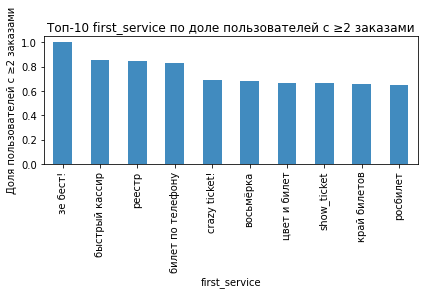

In [51]:
#визуализируем распределение first_service
plt.figure()
(
    profiles.groupby('first_service')['is_two']
    .mean()
    .sort_values(ascending=False)  # сортировка по убыванию
    .head(10)                      # берём 10 самых больших
    .plot(kind='bar', alpha=0.85)
)
plt.title('Топ-10 first_service по доле пользователей с ≥2 заказами')
plt.xlabel('first_service')
plt.ylabel('Доля пользователей с ≥2 заказами')
plt.tight_layout()
plt.show()

**Анализ возвратов покупателей**

**Вывод:**

1️⃣ Какие сегменты пользователей чаще возвращаются на Яндекс.Афишу?

Выставки, театр и desktop показывают самые высокие доли повторных заказов.

2️⃣ Есть ли «успешные точки входа»?

Да. Первые заказы, связанные с выставками и театром, можно считать эффективными точками входа — их пользователи возвращаются чаще среднего.

3️⃣ Нужно ли учитывать размер сегментов?

Обязательно. Малые группы (десятки пользователей) часто дают искажённые значения (0% или 100%), поэтому при интерпретации важно фильтровать сегменты по числу наблюдений.

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

**На основе выполненного анализа можно сделать следующие выводы о релевантности гипотез**
Гипотеза 1 (Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.).
**НЕВЕРНО, доля пользователей, совершающих повторный заказ, выше среди посетивших концерты**

Гипотеза 2 (В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.).
**НЕВЕРНО, больше всего заказов наблюдается в Каменевском регионе (91058), Североярской области (44049), Широковской области (16457), Медовской области (13901) и Озернинском крае (10476). При этом доля повторных заказов выши всего в верхозерском крае (100%), озернопольской области (89%), Радужнопольском крае (79%), лесостепном крае (72%) и Горноземском регионе (68%)**

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [52]:
#создадим датафреймы покупателей с одним заказом и более 2 заказа
profiles_1_order=profiles.loc[profiles['is_two']==0]
profiles_2_order=profiles.loc[profiles['is_two']==1]


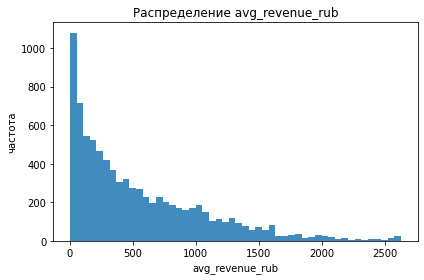

In [53]:
#построим гистограмму для распределения средней выручки для пользователей с одним заказом
plt.figure()
profiles_1_order['avg_revenue_rub'].plot(kind='hist', bins=50, alpha=0.85)
plt.title('Распределение avg_revenue_rub')
plt.xlabel('avg_revenue_rub'); plt.ylabel('частота'); plt.tight_layout()

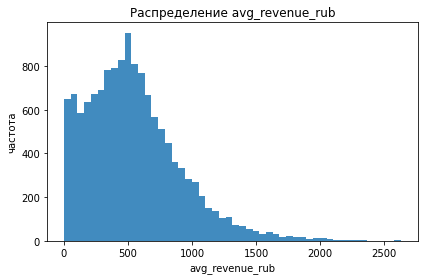

In [54]:
#построим гистограмму для распределения средней выручки для пользователей с 2+ заказами
plt.figure()
profiles_2_order['avg_revenue_rub'].plot(kind='hist', bins=50, alpha=0.85)
plt.title('Распределение avg_revenue_rub')
plt.xlabel('avg_revenue_rub'); plt.ylabel('частота'); plt.tight_layout()

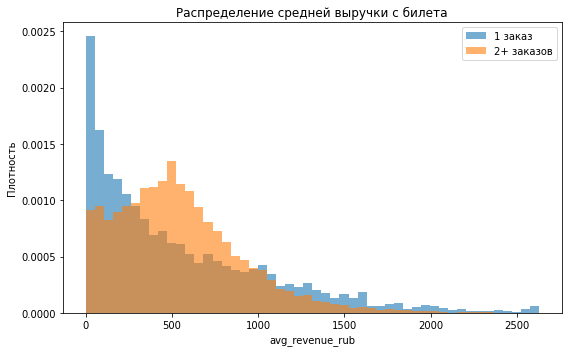

In [55]:
plt.figure(figsize=(8, 5))

plt.hist(
    profiles_1_order['avg_revenue_rub'],
    bins=50,
    alpha=0.6,
    density=True,
    label='1 заказ'
)

plt.hist(
    profiles_2_order['avg_revenue_rub'],
    bins=50,
    alpha=0.6,
    density=True,
    label='2+ заказов'
)

plt.title('Распределение средней выручки с билета')
plt.xlabel('avg_revenue_rub')
plt.ylabel('Плотность')
plt.legend()
plt.tight_layout()
plt.show()

**Выводы по задаче 4.2.1**
Группы пользователей существенно отличаются

У пользователей с одним заказом (синие столбцы) распределение выручки смещено влево, большинство значений концентрируется в диапазоне до ~500–700 руб.

У вернувшихся пользователей (оранжевые столбцы) распределение более равномерное и имеет пик в диапазоне 700–1000 руб., что говорит о чуть большей средней выручке.

Можно предположить, что пользователи с более высокой выручкой чаще возвращаются и совершают повторные заказы.

Общая форма распределений схожа (обе с длинным правым «хвостом»), но группа с 2+ заказами демонстрирует систематически большие значения avg_revenue_rub.

***Пользователи, совершающие повторные заказы, в среднем приносят больше выручки с билета.
Это может свидетельствовать о том, что более «ценные» клиенты чаще возвращаются на сервис.***


---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [56]:
#создадим датафреймы покупателей с 2-4 закаов и 5+ заказов
profiles_2_4_order = profiles.loc[(profiles['is_two'] == 1) & (profiles['is_five'] == 0)]
profiles_5_order=profiles.loc[profiles['is_five']==1]

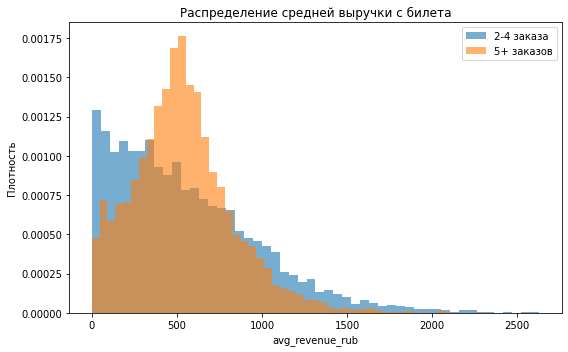

In [57]:
plt.figure(figsize=(8, 5))

plt.hist(
    profiles_2_4_order['avg_revenue_rub'],
    bins=50,
    alpha=0.6,
    density=True,
    label='2-4 заказа'
)

plt.hist(
    profiles_5_order['avg_revenue_rub'],
    bins=50,
    alpha=0.6,
    density=True,
    label='5+ заказов'
)

plt.title('Распределение средней выручки с билета')
plt.xlabel('avg_revenue_rub')
plt.ylabel('Плотность')
plt.legend()
plt.tight_layout()
plt.show()

**Выводы по задаче 4.2.2**
Различия в выручке есть: у группы "5+ заказов" распределение нормальное с пиком в районе 600-700 рублей сдвинутым вправо (относительно распределения "2-4 заказов"). 

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

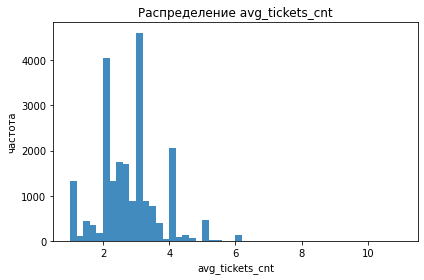

In [58]:
#Построим распределение пользователей по среднему кол-ву билетов в заказе
plt.figure()
profiles['avg_tickets_cnt'].plot(kind='hist', bins=50, alpha=0.85)
plt.title('Распределение avg_tickets_cnt')
plt.xlabel('avg_tickets_cnt'); plt.ylabel('частота'); plt.tight_layout()

In [59]:
#выведем статистику по avg_tickets_cnt
profiles['avg_tickets_cnt'].describe()

count    21838.000000
mean         2.744062
std          0.913083
min          1.000000
25%          2.000000
50%          2.750000
75%          3.080000
max         11.000000
Name: avg_tickets_cnt, dtype: float64

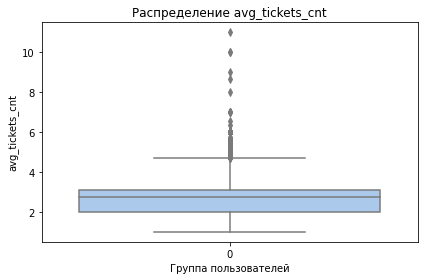

In [60]:
#построим boxplot`
sns.boxplot(
    data=profiles['avg_tickets_cnt'],
    palette='pastel'
)

plt.title('Распределение avg_tickets_cnt')
plt.xlabel('Группа пользователей')
plt.ylabel('avg_tickets_cnt')
plt.tight_layout()
plt.show()

In [61]:
#создадим датафреймы по сегментам пользователей (по среднемку количеству билетов в запасе)
seg_1_2 = profiles[(profiles['avg_tickets_cnt'] >= 1) & (profiles['avg_tickets_cnt'] < 2)]
seg_2_3 = profiles[(profiles['avg_tickets_cnt'] >= 2) & (profiles['avg_tickets_cnt'] < 3)]
seg_3_5 = profiles[(profiles['avg_tickets_cnt'] >= 3) & (profiles['avg_tickets_cnt'] < 5)]
seg_5_plus = profiles[profiles['avg_tickets_cnt'] >= 5]

In [62]:
#Посчитаем общее число пользователей и долю  пользователей совершивших повторные заказы.
print('Общее число пользователей 1-2 билета в заказе', seg_1_2['user_id'].nunique())
print('Доля пользователей с повторными заказами (1-2 билета в заказе)', seg_1_2['is_two'].mean())
print()
print('Общее число пользователей 2-3 билета в заказе', seg_2_3['user_id'].nunique())
print('Доля пользователей с повторными заказами (2-3 билета в заказе)', seg_2_3['is_two'].mean())
print()
print('Общее число пользователей 3-5 билета в заказе', seg_3_5['user_id'].nunique())
print('Доля пользователей с повторными заказами (3-5 билета в заказе)', seg_3_5['is_two'].mean())
print()
print('Общее число пользователей более 5 билета в заказе', seg_5_plus['user_id'].nunique())
print('Доля пользователей с повторными заказами (более 5 билета в заказе)', seg_5_plus['is_two'].mean())
print()

Общее число пользователей 1-2 билета в заказе 2410
Доля пользователей с повторными заказами (1-2 билета в заказе) 0.5124481327800829

Общее число пользователей 2-3 билета в заказе 9695
Доля пользователей с повторными заказами (2-3 билета в заказе) 0.7413099535843218

Общее число пользователей 3-5 билета в заказе 9072
Доля пользователей с повторными заказами (3-5 билета в заказе) 0.5433201058201058

Общее число пользователей более 5 билета в заказе 661
Доля пользователей с повторными заказами (более 5 билета в заказе) 0.1875945537065053



**Выводы по задаче 4.2.3**
Распределение по сегментам

Всего пользователей: 21 838

1–<2 билета: 2 410 → 11.0%

2–<3 билета: 9 695 → 44.4%

3–<5 билета: 9 072 → 41.5%

5+ билетов: 661 → 3.0%

Вывод: распределение сильно сконцентрировано в сегментах 2–<3 и 3–<5 (вместе ~86%). Сегмент 5+ — очень маленький (3%).

Доли повторных покупок

1–<2: 51.2%

2–<3: 74.1% ⬆️ (самая высокая и при этом наибольший по объёму сегмент)

3–<5: 54.3%

5+: 18.8% ⬇️ (аномально низкая, но сегмент маленький)

**Вывод**

Есть сегмент с аномально высокой долей повторов — 2–<3 билета (~74%). Это не артефакт малого объёма, т.к. сегмент самый крупный.

Есть сегмент с аномально низкой долей — 5+ билетов (~19%). Однако его доля всего 3%, поэтому показатель стоит интерпретировать осторожно.

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [63]:
#создадим новый столбец с днем недели первого заказа
profiles['first_order_dt'] = pd.to_datetime(profiles['first_order_dt'], errors='coerce')
profiles['weekday'] = profiles['first_order_dt'].dt.day_name()
profiles.head()

,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets_cnt,mean_days_between,is_two,is_five,weekday
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,каменевский регион,край билетов,театр,1,1521.940000,4.000000,NaN,0,0,Tuesday
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,каменевский регион,мой билет,выставки,2,774.010000,3.000000,75.0,1,0,Tuesday
2,000898990054619,2024-07-13,2024-10-23,mobile,североярская область,лови билет!,другое,3,767.213333,2.666667,51.0,1,0,Saturday
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,каменевский регион,край билетов,театр,1,917.830000,4.000000,NaN,0,0,Thursday
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,поленовский край,лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0,Sunday


In [64]:
#Посчитаем и визуализируем для каждого дня недели общее число пользователей и долю пользователей, совершивших повторные заказы.
profiles['weekday'].value_counts()

Saturday     3456
Friday       3258
Tuesday      3188
Thursday     3119
Wednesday    3076
Monday       2931
Sunday       2810
Name: weekday, dtype: int64

In [65]:
profiles['weekday'].value_counts(normalize=True)

Saturday     0.158256
Friday       0.149189
Tuesday      0.145984
Thursday     0.142824
Wednesday    0.140855
Monday       0.134216
Sunday       0.128675
Name: weekday, dtype: float64

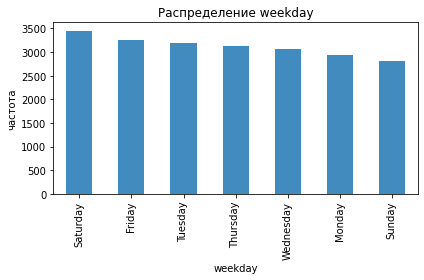

In [66]:
#Построим гистограмму дней недели первого заказа
plt.figure()
profiles['weekday'].value_counts().plot(kind='bar', alpha=0.85)
plt.title('Распределение weekday')
plt.xlabel('weekday'); plt.ylabel('частота'); plt.tight_layout()

**Выводы по задаче 4.3.1**
Анализ показал что существует определенная зависимость между датой первого заказа и днем недели, так наибольшее число заказов (3456) произошло в воскресенье, а наименьшее число заказов (2810) - в воскресенье

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [67]:
#создадим датафреймы по сегментам пользователей (по количеству заказов)
profiles['first_order_dt'] = pd.to_datetime(profiles['first_order_dt'], errors='coerce')
profiles['last_order_dt'] = pd.to_datetime(profiles['last_order_dt'], errors='coerce')
seg_orders_2_4 = profiles[(profiles['total_orders'] >= 2) & (profiles['total_orders'] <= 4)]
seg_orders_5_plus = profiles[profiles['total_orders'] >= 5]

In [68]:
# сегменты
seg_orders_2_4 = profiles[(profiles['total_orders'] >= 2) & (profiles['total_orders'] <= 4)].copy()
seg_orders_5_plus = profiles[profiles['total_orders'] >= 5].copy()

seg_orders_2_4['avg_time_between_orders'] = (
    (seg_orders_2_4['last_order_dt'] - seg_orders_2_4['first_order_dt'])
    / (seg_orders_2_4['total_orders'] - 1)
).dt.days

seg_orders_5_plus['avg_time_between_orders'] = (
    (seg_orders_5_plus['last_order_dt'] - seg_orders_5_plus['first_order_dt'])
    / (seg_orders_5_plus['total_orders'] - 1)
).dt.days

In [69]:
#посчитаем среднией avg_time_between_orders для обоих сегментов
print(seg_orders_2_4['avg_time_between_orders'].mean())
print(seg_orders_5_plus['avg_time_between_orders'].mean())

21.33039339213216
9.236102337334176


**Выводы по задаче 4.3.2**
Среднее время междя заказами для обоих сегментов существенно различается: пользователи с 2-4 заказами в среднем имеют 21 день между заказами, а пользователи с 5+ заказов - всего 9

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [70]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = profiles[['first_order_dt', 'last_order_dt', 'first_device','first_region', 'first_service', 'first_event_type', 'total_orders',
       'avg_revenue_rub','avg_tickets_cnt']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной total_orders')
correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)

interval columns not set, guessing: ['total_orders', 'avg_revenue_rub', 'avg_tickets_cnt']
Корреляционная матрица с коэффициентом phi_k для переменной total_orders


,total_orders
first_order_dt,0.156649
first_region,0.128413
first_service,0.101877
last_order_dt,0.000000
first_device,0.000000
first_event_type,0.000000
avg_revenue_rub,0.000000
avg_tickets_cnt,0.000000


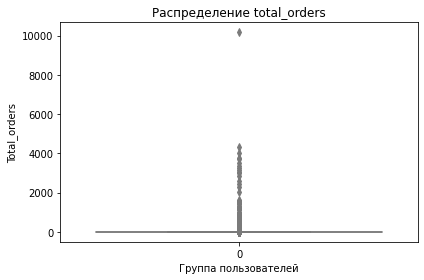

In [71]:
#Как и было написано в задании - корреляция слабая, возможная причина в особенностях распределения значений в total_orders

#Построим boxplot для total orders
sns.boxplot(
    data=profiles['total_orders'],
    palette='pastel'
)

plt.title('Распределение total_orders')
plt.xlabel('Группа пользователей')
plt.ylabel('Total_orders')
plt.tight_layout()
plt.show()


In [72]:
#Изучим статистику по total_orders
profiles['total_orders'].describe()

count    21838.000000
mean        13.160775
std        121.577370
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      10168.000000
Name: total_orders, dtype: float64

Очень неравномерная выборка сильно искажает корреляцию

In [76]:
# Скопируем фрейм, чтобы не испортить оригинал
profiles_corr = profiles.copy()

# Преобразуем даты в числовые значения (количество дней от минимальной даты)
for col in ['first_order_dt', 'last_order_dt']:
    profiles_corr[col] = (profiles_corr[col] - profiles_corr[col].min()).dt.days

# Сегменты
seg_total_orders_1 = profiles_corr[profiles_corr['total_orders'] == 1]
seg_total_orders_2_4 = profiles_corr[(profiles_corr['total_orders'] >= 2) & (profiles_corr['total_orders'] <= 4)]
seg_total_orders_5_plus = profiles_corr[profiles_corr['total_orders'] >= 5]

# Колонки
cols = [
    'first_order_dt', 'last_order_dt', 'first_device',
    'first_region', 'first_service', 'first_event_type',
    'total_orders', 'avg_revenue_rub', 'avg_tickets_cnt'
]

interval_cols = ['total_orders', 'avg_revenue_rub', 'avg_tickets_cnt',
                 'first_order_dt', 'last_order_dt']

# Корреляции
print('Сегмент: 1 заказ')
corr_1 = seg_total_orders_1[cols].phik_matrix(interval_cols=interval_cols)
if 'total_orders' in corr_1.columns:
    display(corr_1[['total_orders']].sort_values(by='total_orders', ascending=False))
else:
    print('⚠️ Нет разброса в total_orders (все = 1), корреляция не рассчитывается.')

print('\nСегмент: 2–4 заказа')
corr_2_4 = seg_total_orders_2_4[cols].phik_matrix(interval_cols=interval_cols)
display(corr_2_4[['total_orders']].sort_values(by='total_orders', ascending=False))

print('\nСегмент: 5+ заказов')
corr_5_plus = seg_total_orders_5_plus[cols].phik_matrix(interval_cols=interval_cols)
display(corr_5_plus[['total_orders']].sort_values(by='total_orders', ascending=False))

Сегмент: 1 заказ


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable total_orders for analysis 1. Dropping this column
  warnings.warn(


⚠️ Нет разброса в total_orders (все = 1), корреляция не рассчитывается.

Сегмент: 2–4 заказа


,total_orders
total_orders,1.000000
avg_tickets_cnt,0.369235
first_order_dt,0.150883
last_order_dt,0.137948
avg_revenue_rub,0.108652
first_service,0.062915
first_device,0.009511
first_region,0.000000
first_event_type,0.000000



Сегмент: 5+ заказов


,total_orders
total_orders,1.000000
first_region,0.282458
first_service,0.117371
first_order_dt,0.000000
last_order_dt,0.000000
first_device,0.000000
first_event_type,0.000000
avg_revenue_rub,0.000000
avg_tickets_cnt,0.000000


Сегмент = 1 заказ. phik правомерно «выкинул» total_orders: в срезе нет разброса (все = 1) → корреляцию с ним посчитать нельзя.

2–4 заказа. Наибольшая связь с количеством заказов даёт
avg_tickets_cnt (≈0.37), дальше слабее — first_order_dt (≈0.15), last_order_dt (≈0.14), ещё слабее — avg_revenue_rub (≈0.11). Категориальные признаки почти не связаны.

5+ заказов. Выделяется first_region (≈0.28). Остальное близко к нулю — часто так бывает из-за малого N и/или сильного перекоса распределений внутри среза.

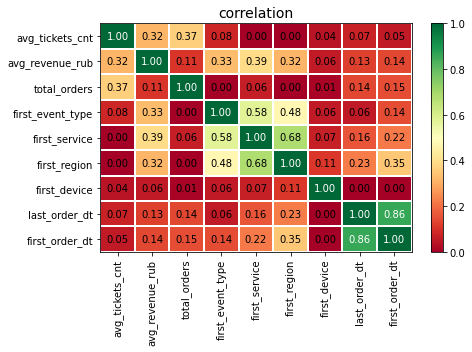

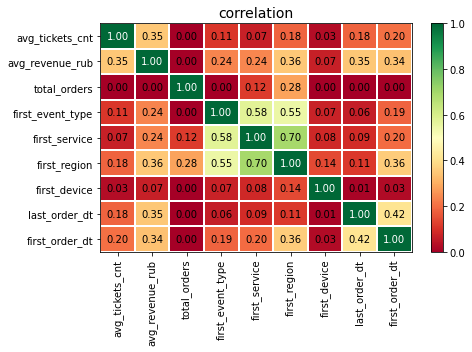

In [77]:
#построим heatmap
from phik.report import plot_correlation_matrix

plot_correlation_matrix(corr_2_4.values,    x_labels=corr_2_4.columns,    y_labels=corr_2_4.index,    vmin=0, vmax=1)
plot_correlation_matrix(corr_5_plus.values, x_labels=corr_5_plus.columns, y_labels=corr_5_plus.index, vmin=0, vmax=1)


### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

**Общие выводы и рекомендации**

** Данные и подготовка**

Для анализа использовались данные по заказам **Яндекс.Афиши**.
На этапе подготовки я выполнил базовую очистку:

* убрал дубликаты и обработал пропуски;
* перевёл все суммы из тенге в рубли;
* добавил вычисляемые признаки:

  * `avg_revenue_rub` — средняя выручка пользователя,
  * `avg_tickets_cnt` — среднее количество билетов в заказе,
  * `total_orders` — общее количество заказов,
  * а также признаки первого заказа — тип события, устройство, регион, даты первого и последнего заказа.

После подготовки данных в выборке оказалось **около 21,8 тыс. пользователей**.
Пользователи были разделены на сегменты по количеству заказов.

---

**Основные результаты анализа

* **Распределение заказов**: большинство пользователей сделали **только один заказ**, а доля повторных быстро снижается. Есть небольшая, но стабильная группа активных покупателей (5+ заказов).

* **Связь количества билетов и повторных заказов:**

  * 1–2 билета — повторных покупателей около **51%**;
  * 2–3 билета — **самый лояльный сегмент, 74%** повторных заказов;
  * 3–5 билетов — примерно **54%**;
  * 5+ билетов — около **19%**, вероятно, это разовые крупные заказы.

* **Тип первого события:**

  * Больше всего возвращаются пользователи, начавшие с **выставок (64%)** и **театра (63%)**;
  * Чуть ниже доля у **концертов** и **стендапа**;
  * Минимальные показатели у **спорта** и **ёлок**.

* **Корреляционный анализ:**

  * Число заказов умеренно связано с количеством билетов и средней выручкой.
  * География и тип первого сервиса начинают играть роль у пользователей с 5 и более заказами.
  * Устройство и тип первого события показали очень слабую связь с количеством заказов.

* **Временные характеристики:**
  Пользователи, которые совершают заказы с небольшими интервалами, немного чаще возвращаются, но зависимость слабая.

---

**Что это значит

1. Пользователи, начинающие с **2–3 билетов**, чаще всего становятся постоянными.
2. **Крупные первые заказы (>5 билетов)** не приводят к удержанию — скорее всего, это групповые или корпоративные покупки.
3. **Тип события** имеет значение: выставки и театр работают лучше всего, спорт и ёлки — хуже.
4. У активных пользователей (5+ заказов) большую роль играет **регион** — есть территории с более высокой вовлечённостью.

---

**Рекомендации

* **Фокус на сегменте 2–3 билета.**
  Настроить коммуникации и рекомендации именно для этой группы: рассылки с подборками похожих событий, напоминания о новых мероприятиях.

* **Отдельная работа с крупными заказами.**
  Пользователям, сделавшим большие первые заказы, можно предлагать корпоративные предложения, групповые акции или программы лояльности.

* **Событийная персонализация.**
  Развивать направления **выставок** и **театра**, так как они показывают лучший возврат.
  Для **спорта** и **ёлок** стоит продумать стимулирующие акции или дополнительные скидки.

* **Учитывать время между покупками.**
  Настроить триггеры — если пользователь не возвращается в течение определённого периода, предлагать новые события в его регионе.

* **Продолжить региональный анализ.**
  Определить регионы с высокой долей активных пользователей и сосредоточить там маркетинговые усилия.

---

**Итог:**
Удержание пользователей можно улучшить за счёт персонализированных коммуникаций и фокуса на сегментах, где вероятность повторных покупок выше — особенно среди тех, кто впервые покупает **2–3 билета**.


### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Ссылка на github**
https://github.com/diomed90/yandex_afisha_analys_final_project_module_2.git